# Develop A Neural Network That Can Read Handwriting

# Author : Nischitha D

# Data Science Intern @ LetsGrowMore 

# Dataset link : http://yann.lecun.com/exdb/mnist/

# Importing Necessary Library

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout
import numpy as np

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [12]:
x_train.shape #The training dataset contains 60,000 images where each is 28x28 pixel greyscale image.

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape #The training dataset contains 10,000 images where each is 28x28 pixel greyscale image.

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

# Visualizing Dataset

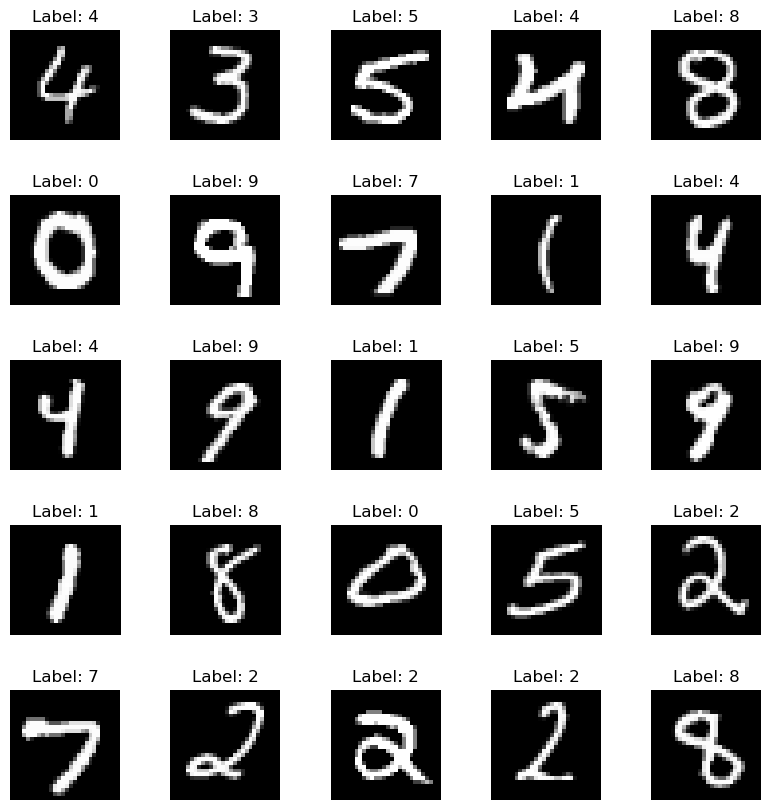

In [13]:
import matplotlib.pyplot as plt
indices = np.random.randint(0, len(x_train), size=25)
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)


for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[indices[i]], cmap='gray')
    ax.set_title(f"Label: {y_train[indices[i]]}")
    ax.axis('off')

plt.show()

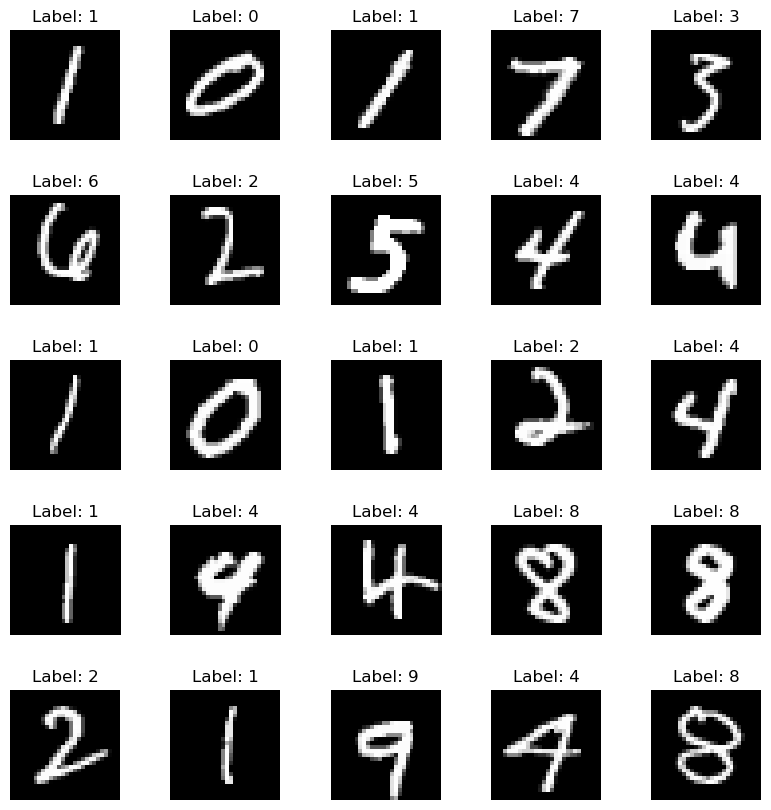

In [14]:
import matplotlib.pyplot as plt
indices = np.random.randint(0, len(x_test), size=25)
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)


for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[indices[i]], cmap='gray')
    ax.set_title(f"Label: {y_test[indices[i]]}")
    ax.axis('off')

plt.show()

In [67]:
x_train_d = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_d = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [65]:
x_train_normalized = x_train_d/ 255.0
print("Minimum Value:", np.min(x_train_normalized))
print("Maximum Value:", np.max(x_train_normalized))

Minimum Value: 0.0
Maximum Value: 1.0


# Visulised Normalised Dataset

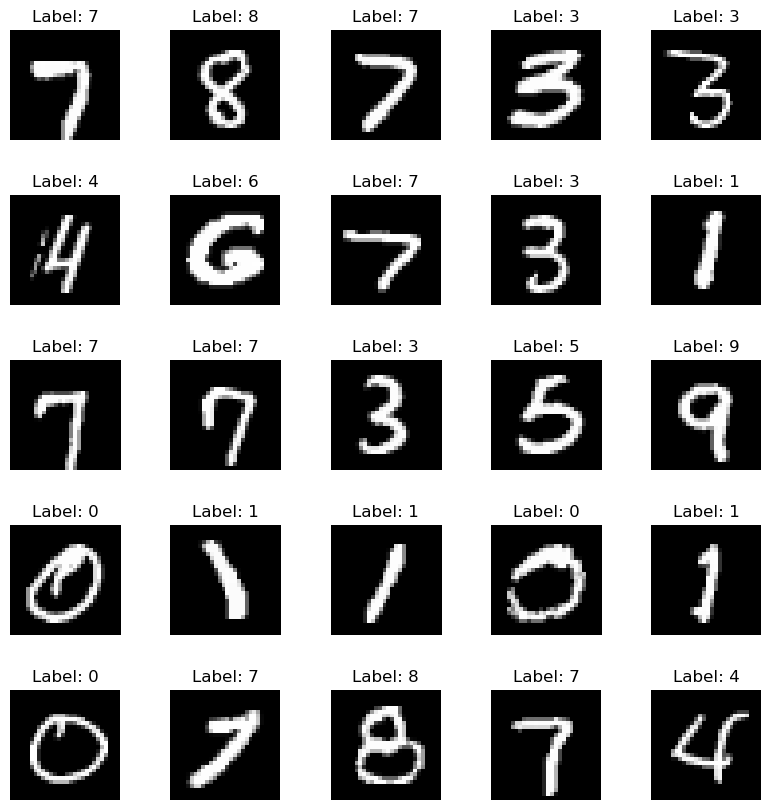

In [68]:
indices = np.random.randint(0, len(x_train_normalized), size=25)
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_normalized[indices[i]], cmap='gray')
    ax.set_title(f"Label: {y_train[indices[i]]}")
    ax.axis('off')

plt.show()

In [39]:
image_shape = x_train_normalized.shape[1:]
print(image_shape)

(28, 28, 1)


# Build the CNN Model

In [41]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# Train the Model

In [50]:
history= model.fit(x_train_d, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.0745 - val_accuracy: 0.9888
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.1002 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.0699 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0191 - accuracy: 0.9959 - val_loss: 0.0802 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0163 - accuracy: 0.9966 - val_loss: 0.0736 - val_accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.0888 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0141 - accuracy: 0.9971 - val_loss: 0.1189 -

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 576)              

# Evaluate the Model

In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1330 - accuracy: 0.9856
Test accuracy: 0.9855999946594238


# Plot Showing the Training and Validation Accuracy over the Epochs

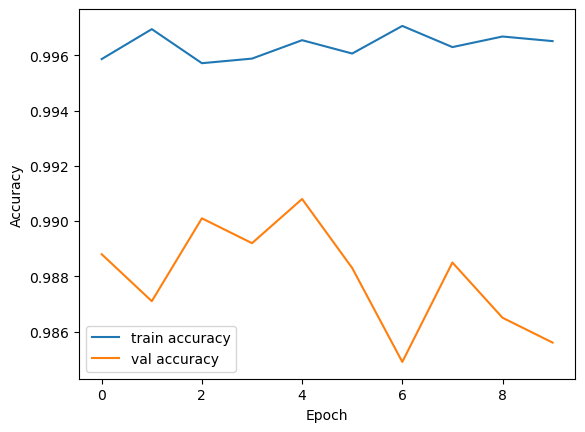

In [53]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
model.save("C:/Users/NISCHITHA/Desktop/model training/handwriting model.h5")

In [57]:
from tensorflow.keras.models import load_model
loaded_model = load_model("C:/Users/NISCHITHA/Desktop/model training/handwriting model.h5")

In [58]:
predictions = loaded_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


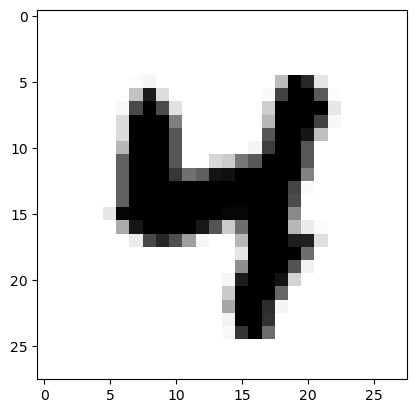

In [62]:
plt.imshow(x_test[85], cmap = plt.get_cmap('binary'))

In [63]:
print("The prediction is : ", np.argmax(predictions[85]))

The prediction is :  4


The prediction is :  9


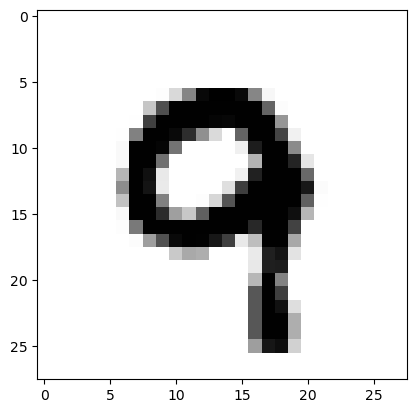

In [64]:
plt.imshow(x_test[99], cmap = plt.get_cmap('binary'))
print("The prediction is : ", np.argmax(predictions[99]))